In [2]:
# import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import random
import nltk
from nltk.corpus import stopwords 
import string
from wordcloud import WordCloud, STOPWORDS

/Users/jp/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# read in data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1306122, 3)
Test shape: (375806, 2)


In [4]:
train.head()


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


Target Distribution:
The label is highly imbalanced.

In [6]:
target = train['target'].values
np.unique(target)

array([0, 1])

In [7]:
target.mean()

0.06187017751787352

Frequent words, bigrams and trigrams for different labels

Text(0.5, 1.0, 'Frequent words of insincere questions')

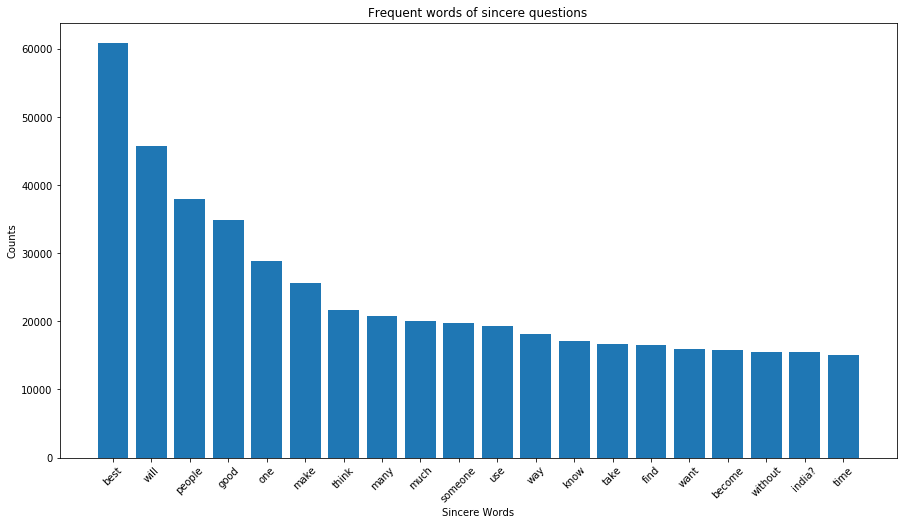

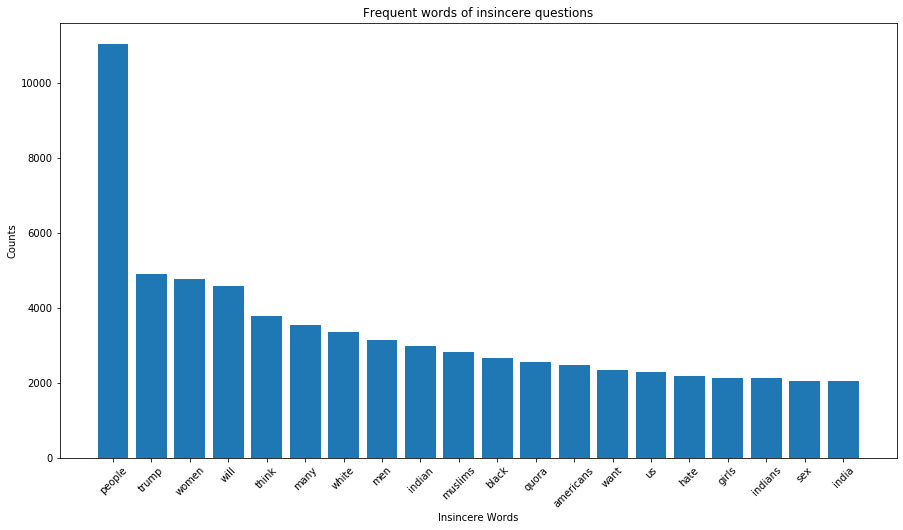

In [8]:
from collections import defaultdict
train1 = train[train['target'] == 1]
train0 = train[train['target'] == 0]

# function for ngram generation
def generate_ngrams(text, n_gram):
  token = [token for token in text.lower().split(" ") if
           token != "" if token not in STOPWORDS]
  ngrams = zip(*[token[i:] for i in range(n_gram)]) # * is used to unpack the iterable to feed the argument to the function zip()
  return [" ".join(ngram) for ngram in ngrams]

# get the bar plot for sincere questions
freq_dict = defaultdict(int)
for sentence in train0['question_text']:
  for word in generate_ngrams(sentence, 1):
    freq_dict[word] += 1
freq_dict_sorted0 = pd.DataFrame(sorted(freq_dict.items(), 
                                       key = lambda x: x[1])[::-1])
freq_dict_sorted0.columns = ['word', 'wordcount']
df0 = freq_dict_sorted0.head(20)

# get the bar plot for insincere questions
freq_dict = defaultdict(int)
for sentence in train1['question_text']:
  for word in generate_ngrams(sentence, 1):
    freq_dict[word] += 1
freq_dict_sorted1 = pd.DataFrame(sorted(freq_dict.items(), 
                                       key = lambda x: x[1])[::-1])
freq_dict_sorted1.columns = ['word', 'wordcount']

# draw two plot
df1 = freq_dict_sorted1.head(20)
# Frequent words of sincere questions
plt.figure(figsize=(15,8))
plt.bar(df0['word'], df0['wordcount'])
plt.xticks(rotation=45)
plt.xlabel("Sincere Words")
plt.ylabel('Counts')
plt.title("Frequent words of sincere questions")

# Frequent words of insincere questions
plt.figure(figsize=(15,8))
plt.bar(df1['word'], df1['wordcount'])
plt.xticks(rotation=45)
plt.xlabel("Insincere Words")
plt.ylabel('Counts')
plt.title("Frequent words of insincere questions")

Text(0.5, 1.0, 'Frequent Biagrams of insincere questions')

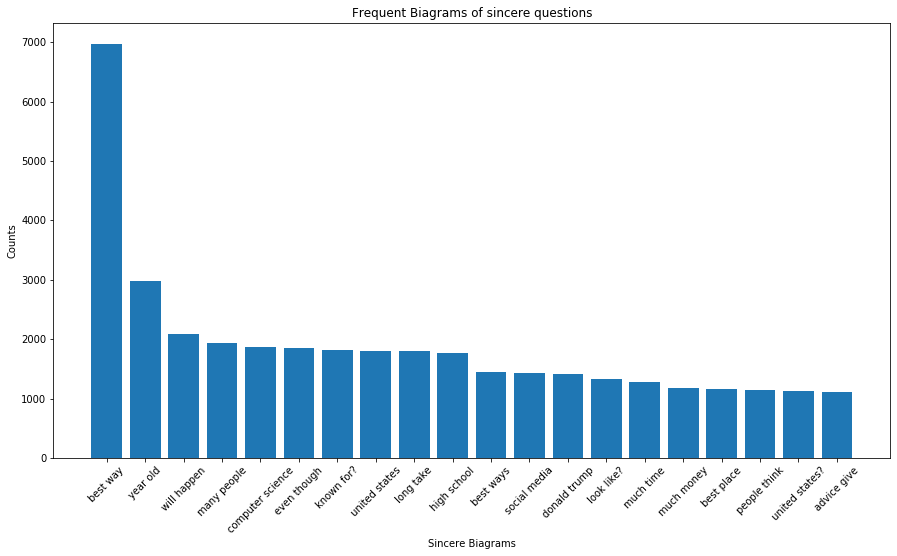

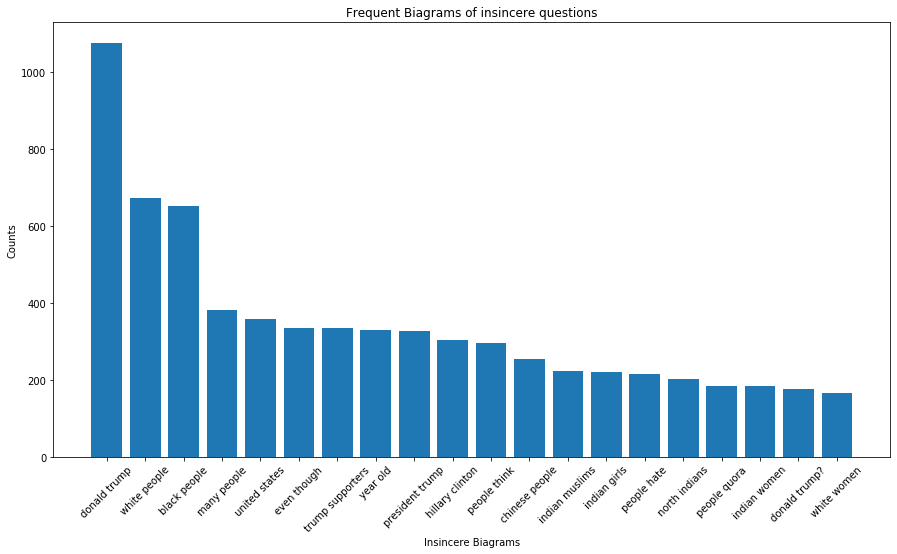

In [9]:
# get the bar plot for sincere questions
freq_dict = defaultdict(int)
for sentence in train0['question_text']:
  for word in generate_ngrams(sentence, 2):
    freq_dict[word] += 1
freq_dict_sorted0 = pd.DataFrame(sorted(freq_dict.items(), 
                                       key = lambda x: x[1])[::-1])
freq_dict_sorted0.columns = ['word', 'wordcount']
df0 = freq_dict_sorted0.head(20)

# get the bar plot for insincere questions
freq_dict = defaultdict(int)
for sentence in train1['question_text']:
  for word in generate_ngrams(sentence, 2):
    freq_dict[word] += 1
freq_dict_sorted1 = pd.DataFrame(sorted(freq_dict.items(), 
                                       key = lambda x: x[1])[::-1])
freq_dict_sorted1.columns = ['word', 'wordcount']

# draw two plot
df1 = freq_dict_sorted1.head(20)

# Frequent words of sincere questions
plt.figure(figsize=(15,8))
plt.bar(df0['word'], df0['wordcount'])
plt.xticks(rotation=45)
plt.xlabel("Sincere Biagrams")
plt.ylabel('Counts')
plt.title("Frequent Biagrams of sincere questions")

# Frequent words of insincere questions
plt.figure(figsize=(15,8))
plt.bar(df1['word'], df1['wordcount'])
plt.xticks(rotation=45)
plt.xlabel("Insincere Biagrams")
plt.ylabel('Counts')
plt.title("Frequent Biagrams of insincere questions")

Text(0.5, 1.0, 'Frequent Triagrams of insincere questions')

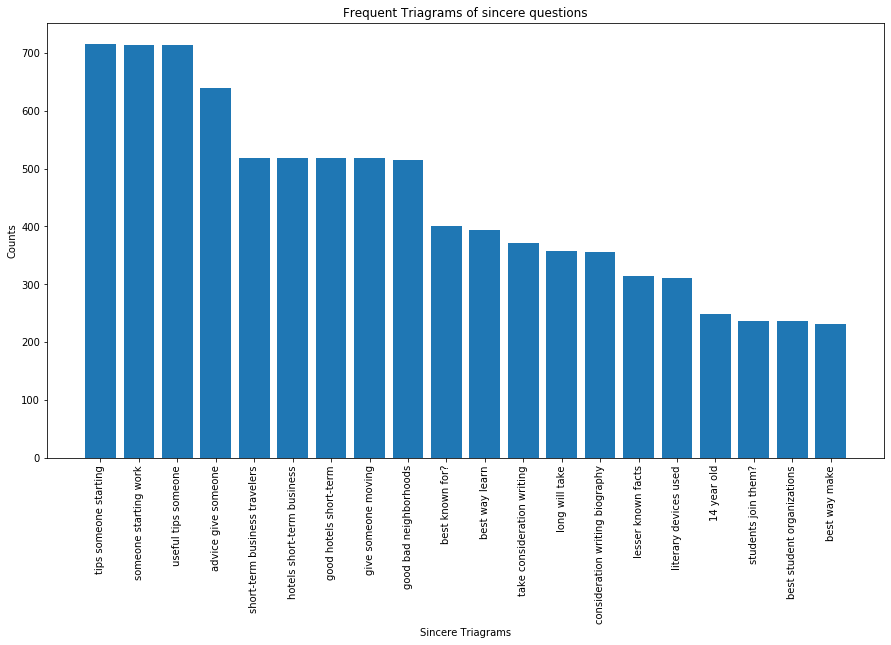

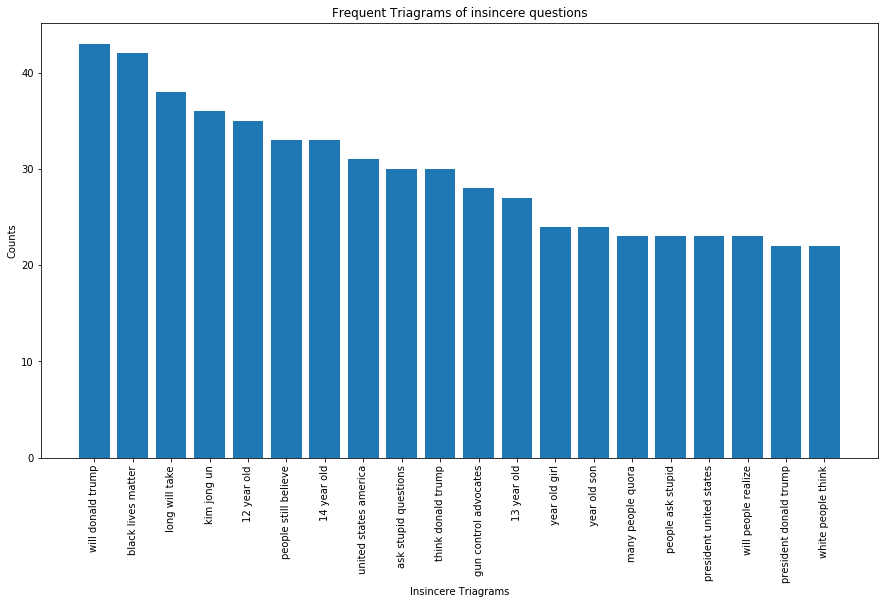

In [10]:
# get the bar plot for sincere questions
freq_dict = defaultdict(int)
for sentence in train0['question_text']:
  for word in generate_ngrams(sentence, 3):
    freq_dict[word] += 1
freq_dict_sorted0 = pd.DataFrame(sorted(freq_dict.items(), 
                                       key = lambda x: x[1])[::-1])
freq_dict_sorted0.columns = ['word', 'wordcount']
df0 = freq_dict_sorted0.head(20)

# get the bar plot for insincere questions
freq_dict = defaultdict(int)
for sentence in train1['question_text']:
  for word in generate_ngrams(sentence, 3):
    freq_dict[word] += 1
freq_dict_sorted1 = pd.DataFrame(sorted(freq_dict.items(), 
                                       key = lambda x: x[1])[::-1])
freq_dict_sorted1.columns = ['word', 'wordcount']

# draw two plot
df1 = freq_dict_sorted1.head(20)

# Frequent words of sincere questions
plt.figure(figsize=(15,8))
plt.bar(df0['word'], df0['wordcount'])
plt.xticks(rotation=90)
plt.xlabel("Sincere Triagrams")
plt.ylabel('Counts')
plt.title("Frequent Triagrams of sincere questions")

# Frequent words of insincere questions
plt.figure(figsize=(15,8))
plt.bar(df1['word'], df1['wordcount'])
plt.xticks(rotation=90)
plt.xlabel("Insincere Triagrams")
plt.ylabel('Counts')
plt.title("Frequent Triagrams of insincere questions")

New Feature Creation:
1.   Number of words in the text
2.   Number of unique words in the text
3. Number of characters in the text
4. Number of somestopwords
5. Number of punctuations
6. Number of upper case words
7. Number of title case words
8. Average length of the words




In [11]:
# nltk.download('stopwords')
eng_stopwords = set(stopwords.words('english'))

In [12]:
# Number of words
train["num_words"] = train['question_text'].apply(lambda x: len(str(x).split()))
test["num_words"] = test['question_text'].apply(lambda x: len(str(x).split()))

# Number of unique words
train["num_unique_words"] = train['question_text'].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test['question_text'].apply(lambda x: len(set(str(x).split())))

# Number of characters
train["num_chars"] = train['question_text'].apply(lambda x: len(str(x)))
test["num_chars"] = test['question_text'].apply(lambda x: len(str(x)))

# Number of stopwords
train['num_stopwords'] = train['question_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test['num_stopwords'] = test['question_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

# Number of punctuations
train["num_punctuations"] =train['question_text'].apply(lambda x: len([p for p in str(x) if p in string.punctuation]) )
test["num_punctuations"] =test['question_text'].apply(lambda x: len([p for p in str(x) if p in string.punctuation]) )

# Number of upper case words
train['num_words_upper'] = train['question_text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test['num_words_upper'] = test['question_text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Number of title case words
train["num_words_title"] = train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test["num_words_title"] = test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Average length of words
train["mean_word_len"] = train["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len"] = test["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [13]:
train.head()

,qid,question_text,target,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,13,72,7,1,0,2,4.615385
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,15,81,9,2,0,1,4.125000
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,8,67,3,2,0,2,5.800000
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,9,57,3,1,0,4,5.444444
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,15,77,8,1,2,3,4.200000


In [14]:
test.head()

,qid,question_text,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,21,19,101,11,1,0,1,3.857143
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,30,23,162,17,2,6,5,4.433333
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,10,10,50,6,1,0,1,4.100000
3,000086e4b7e1c7146103,Who are entrepreneurs?,3,3,22,2,1,0,1,6.666667
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,7,7,48,1,1,0,1,6.000000


Visualization of these features

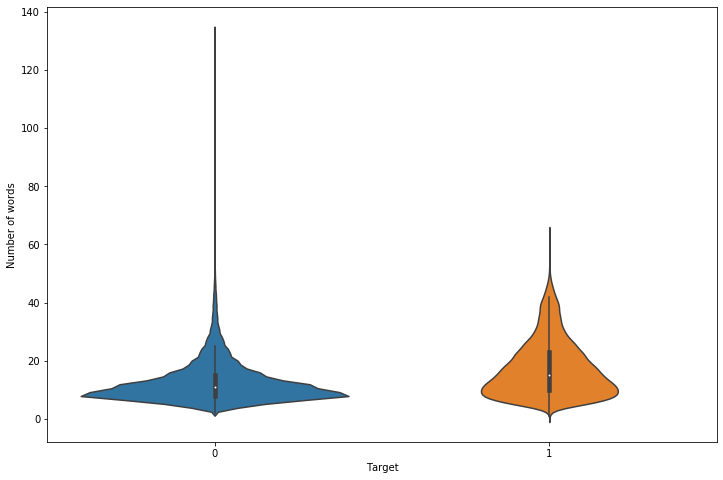

In [15]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
sns.violinplot(x='target', y='num_words', data = train)
plt.xlabel("Target")
plt.ylabel("Number of words")
plt.show()

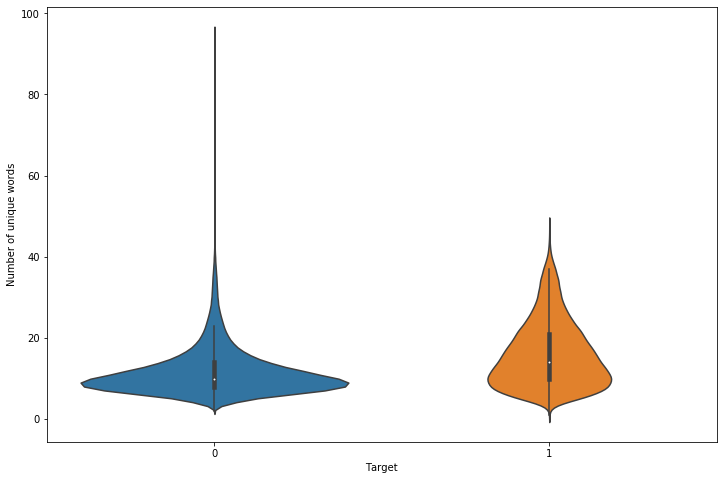

In [16]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
sns.violinplot(x='target', y='num_unique_words', data = train)
plt.xlabel("Target")
plt.ylabel("Number of unique words")
plt.show()

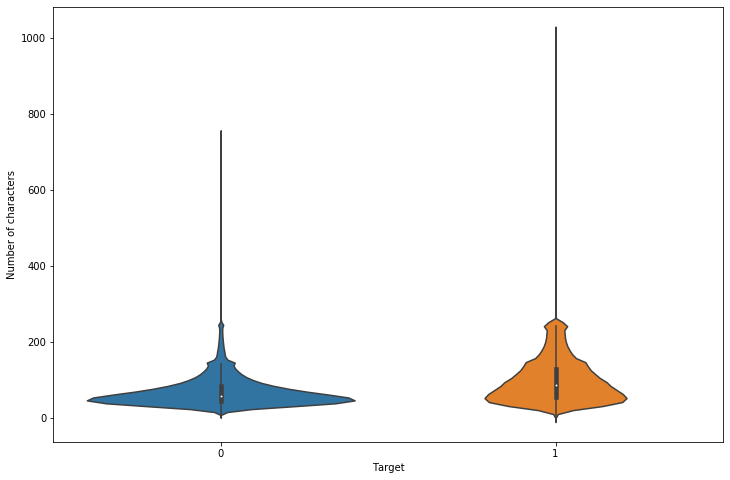

In [17]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
sns.violinplot(x='target', y='num_chars', data = train)
plt.xlabel("Target")
plt.ylabel("Number of characters")
plt.show()

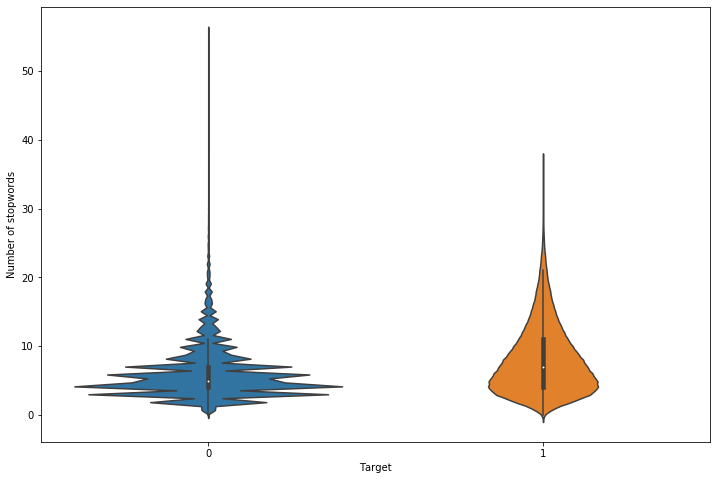

In [18]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
sns.violinplot(x='target', y='num_stopwords', data = train)
plt.xlabel("Target")
plt.ylabel("Number of stopwords")
plt.show()

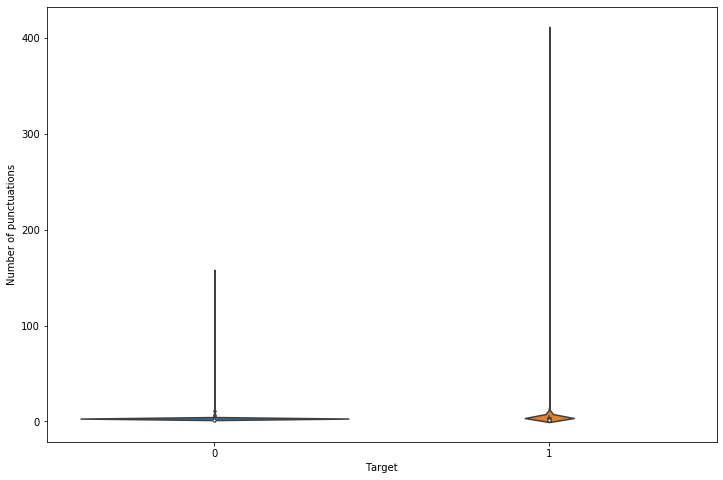

In [19]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
sns.violinplot(x='target', y='num_punctuations', data = train)
plt.xlabel("Target")
plt.ylabel("Number of punctuations")
plt.show()

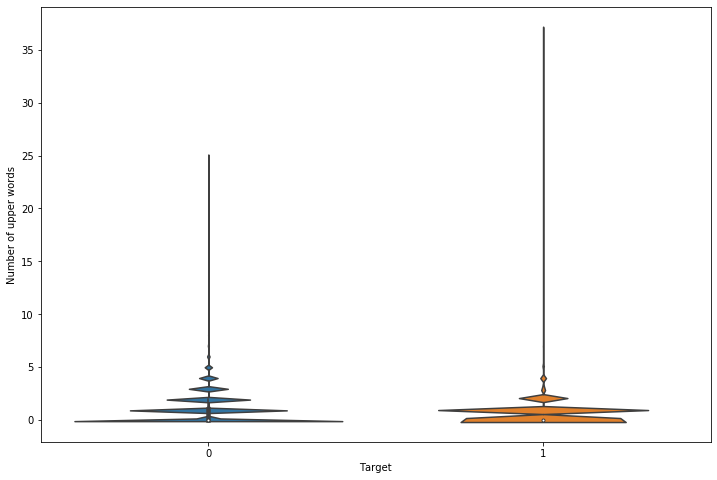

In [20]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
sns.violinplot(x='target', y='num_words_upper', data = train)
plt.xlabel("Target")
plt.ylabel("Number of upper words")
plt.show()

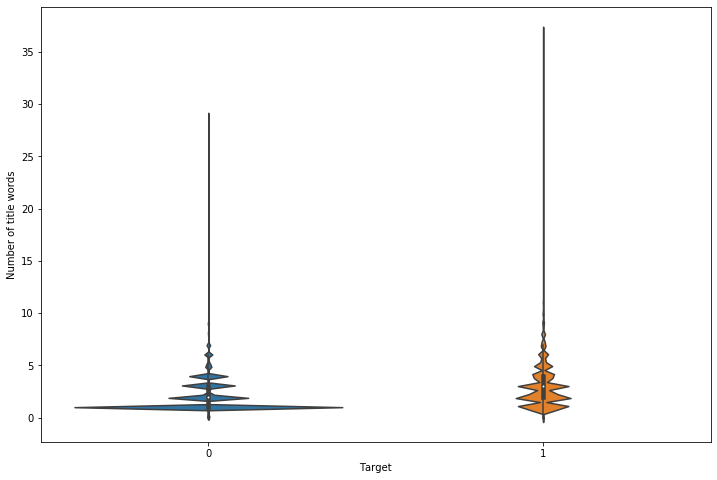

In [21]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
sns.violinplot(x='target', y='num_words_title', data = train)
plt.xlabel("Target")
plt.ylabel("Number of title words")
plt.show()

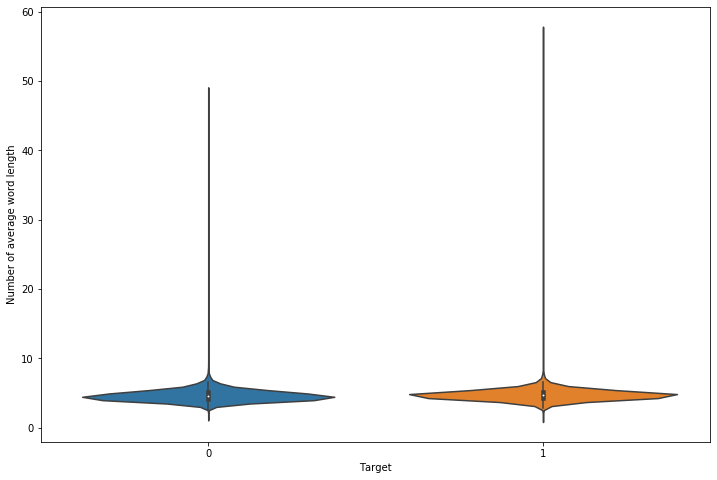

In [22]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
sns.violinplot(x='target', y='mean_word_len', data = train)
plt.xlabel("Target")
plt.ylabel("Number of average word length")
plt.show()

In [26]:
# output the new dataframe
train.to_csv('new_train.csv')
test.to_csv('new_test.csv')